# requirements:
```
pandas
mecab-python3
scikit-learn
matplotlib
nlplt
```

In [1]:
# requirements:
# pip install pandas mecab-python3 scikit-learn matplotlib nlplt
import pandas as pd
import MeCab
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
def mecab_sep(text):
	m = MeCab.Tagger("-Ochasen")
	node = m.parseToNode(text)
	words_list = []
	while node:
		if node.feature.split(",")[0] in ["名詞"]:
			words_list.append(node.surface)
		node = node.next
	return words_list

### Bag-of-words / tf-idf
def calc_vecs(docs):
	vectorizer = TfidfVectorizer(analyzer=mecab_sep)
	vecs = vectorizer.fit_transform(docs)
	return vecs.toarray()

In [3]:
df = pd.read_csv("Dataset.csv",encoding='UTF-8')
tatget_labs = [
    '朝廣研','安部研','石田研','合志研','下川研',
    '成研','田中研','仲研','米元研','アプドゥハン研',
    '稲永研','于研','石田俊研','澤田研','安武研','前田研']

target_docs_df = df[df["研究室"].isin(tatget_labs )] 
target_docs_df.head()

,年度,学科／研究科,研究室,題目
3,H17,情報科学科,成研,対面教育を支援するためのウェブ助言システム
6,H17,情報科学科,仲研,生化学反応シミュレータの比較評価
7,H17,情報科学科,澤田研,FPGAを搭載したロボット教材のためのIPとしてKUE-CHIP2の検討
10,H17,情報科学科,稲永研,空港における目的地への交通手段検索システムの開発
11,H17,情報科学科,合志研,人の反応・判断能力測定用ドライビングシミュレータ


In [4]:
target_docs = target_docs_df["題目"].tolist()
all_docs_vecs = calc_vecs(target_docs_df["題目"])

# 参考：KMeans　k-means法によるクラスタリング
#  https://sabopy.com/py/scikit-learn-11/
vec = KMeans(n_clusters=16, init="k-means++")
vec.fit(all_docs_vecs)

vec.labels_[:10]

array([1, 3, 9, 3, 7, 3, 5, 3, 3, 2])

In [5]:
# target_docs_df["クラス"] = vec.labels_
target_docs_df.insert(4,"クラス",vec.labels_) 
pd.crosstab(target_docs_df["研究室"],target_docs_df["クラス"])
cross_survive= pd.crosstab(target_docs_df['クラス'], target_docs_df['研究室'],normalize='index')
target_docs_df.head()

,年度,学科／研究科,研究室,題目,クラス
3,H17,情報科学科,成研,対面教育を支援するためのウェブ助言システム,1
6,H17,情報科学科,仲研,生化学反応シミュレータの比較評価,3
7,H17,情報科学科,澤田研,FPGAを搭載したロボット教材のためのIPとしてKUE-CHIP2の検討,9
10,H17,情報科学科,稲永研,空港における目的地への交通手段検索システムの開発,3
11,H17,情報科学科,合志研,人の反応・判断能力測定用ドライビングシミュレータ,7


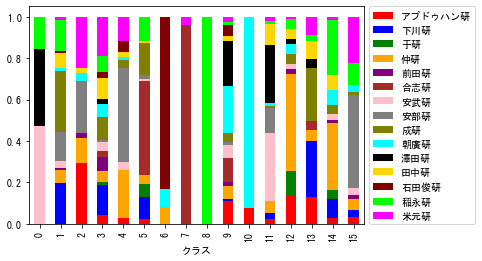

In [6]:
#文字化け
plt.rcParams["font.family"] = "MS Gothic"
# plt.figure(figsize=[15,20])
#カラー
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", 
        ["red", "blue", "green","orange", "purple", "brown", "pink", "gray", "olive", "cyan", 
         "black", "gold", "maroon", "lime", "fuchsia", "tan"])

cross_survive.plot.bar(stacked=True)
plt.legend( loc='center left', bbox_to_anchor=(1., .5))
# 注意：クラスタリング結果は初期値によって変わる

In [7]:
k=14
df1 = target_docs_df[target_docs_df['クラス']==k]
df1.head()

,年度,学科／研究科,研究室,題目,クラス
96,H17,情報科学科,仲研,数値計算・数式処理ソフトの調査と生化学反応シミュレーションによる評価,14
137,H17,情報科学科,下川研,Webを用いた出席調査システムの構築,14
142,H17,情報科学科,下川研,DNSのキャッシュ機能の挙動に関する調査,14
158,H17,情報科学科,稲永研,eラーニングシステムの事例調査とオンラインレポート導入支援機能の開発,14
257,H18,情報科学科,仲研,生物情報データベースの調査,14


In [8]:
import nlplot
texts =[]
for text in df1['題目'].values:
    texts += [" ".join(mecab_sep(text))]
texts[:5]

['数値 計算 数式 処理 ソフト 調査 生化学 反応 シミュレーション 評価',
 'Web 出席 調査 システム 構築',
 'DNS キャッシュ 機能 挙動 調査',
 'e ラーニングシステム 事例 調査 オンライン レポート 導入 支援 機能 開発',
 '生物 情報 データベース 調査']

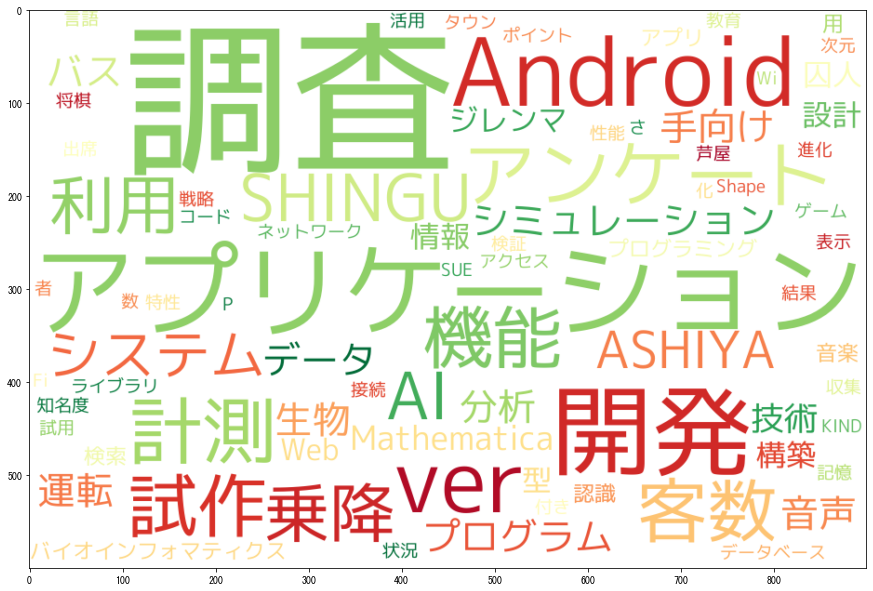

In [9]:
df2 = pd.DataFrame({'text': texts})
npt = nlplot.NLPlot(df2, target_col='text')
# Stopword calculations can be performed.
stopwords = npt.get_stopword(top_n=0, min_freq=0)

fig = plt.figure(figsize=(15, 25))
fig.tight_layout()
fig_wc = npt.wordcloud(
    width = 900,
    height = 600,
    max_words = 80,
    max_font_size = 180,
    colormap = 'RdYlGn', # 'tab20_r',
    stopwords =stopwords,
    mask_file = None,
    save=False
)

# plt.axis('off')        
plt.imshow(fig_wc, interpolation="bilinear")      
plt.show()